In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, 3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [4]:
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
'''Mean Shift clustering is a non-parametric clustering algorithm used in unsupervised machine learning to group similar data points together.
Unlike K-means, which requires the number of clusters to be specified beforehand, Mean Shift does not require the number of clusters to be known 
in advance, making it more flexible in identifying the optimal number of clusters from the data.'''

In [4]:
# The following bandwidth can be automatically detected using
#bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

#ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#ms.fit(X)
#labels = ms.labels_
#cluster_centers = ms.cluster_centers_

#labels_unique = np.unique(labels)
#n_clusters_ = len(labels_unique)

#print("number of estimated clusters : %d" % n_clusters_)
# Estimate bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))
# Fit MeanShift clustering model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=27.161411938994306, bin_seeding=True)

In [5]:
#plt.figure(1)
#plt.clf()

#colors = ["#dede00", "#377eb8", "#f781bf"]
#markers = ["x", "o", "^"]

#for k, col in zip(range(n_clusters_), colors):
#    my_members = labels == k
#    cluster_center = cluster_centers[k]
#    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
#    plt.plot(
#        cluster_center[0],
#        cluster_center[1],
#        markers[k],
#        markerfacecolor=col,
#        markeredgecolor="k",
#        markersize=14,
#    )
#plt.title("Estimated number of clusters: %d" % n_clusters_)
#plt.show()
cluster_centers = ms.cluster_centers_
labels = ms.labels_

In [6]:
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [7]:
cluster_centers

array([[54.95402299, 48.73563218],
       [81.88888889, 81.5       ],
       [82.2       , 19.37142857]])

In [13]:
# Number of clusters
n_clusters = len(cluster_centers)

print("Number of clusters:", n_clusters)

Number of clusters: 3


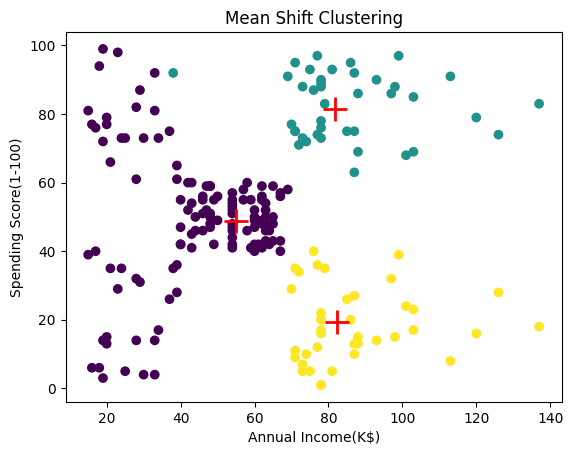

In [21]:
# Plot clusters if data is 2-dimensional
if X.shape[1] == 2:
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='+', color='red', s=300, linewidth=2)
    plt.title('Mean Shift Clustering')
    plt.xlabel('Annual Income(K$)')
    plt.ylabel('Spending Score(1-100)')
    plt.show()